# DATA PREPARATION

In this phase, we will create new variables or transform existing ones to better address our objective.

We will provide examples of how to use internal variables as well as how to enrich the data with external variables.

## SET UP

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime

#Automcompletar rápido
%config IPCompleter.greedy=True

pd.options.display.max_columns = None

## DATA LOADING

Replace the data_file_name.

In [16]:
data_file_name='historical_data_work.pickle'

Data loading.

In [17]:
path= '../../02_Data/02_Work/' + data_file_name

In [18]:
historical = pd.read_pickle(path)
historical

,asset,date,open,high,low,close
0,ADA,2018-04-17,0.25551,0.28800,0.23983,0.24260
1,ADA,2018-04-18,0.24260,0.26460,0.24201,0.26200
2,ADA,2018-04-19,0.26199,0.27500,0.25777,0.27004
3,ADA,2018-04-20,0.27004,0.30442,0.26648,0.30108
4,ADA,2018-04-21,0.30161,0.30700,0.26509,0.28668
...,...,...,...,...,...,...
20639,XRP,2024-11-15,0.77360,0.92790,0.77040,0.89220
20640,XRP,2024-11-16,0.89210,1.26980,0.87780,1.12090
20641,XRP,2024-11-17,1.12080,1.16030,1.00260,1.05430
20642,XRP,2024-11-18,1.05450,1.18650,1.05430,1.11370


## VARIABLE PREPARATION

### Creation of Key KPIs

First, we will create the analysis variables, which are the KPIs identified as kry for this analysis.

We defined two KPIs for this phase:

* **50-day and 200-day moving averages**:  We will use the exponential moving average. This is the arithmetic mean of the previous n values, with weighting factors that decrease exponentially. It gives more importance to the most recent data.
* **annual historical volatility** The Historical Volatility study calculates volatility which can be expressed by the following formula:

<div>
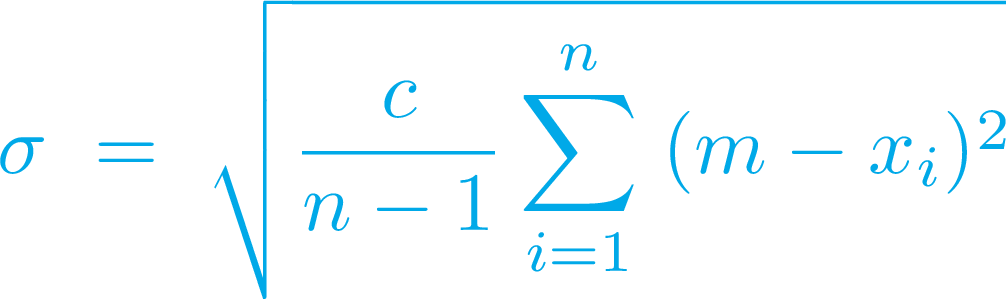
</div>

where c is a coefficient depending on the volatility basis and m is average of logarithmic return xi which, in turn, iscalculated as follows:

<div>
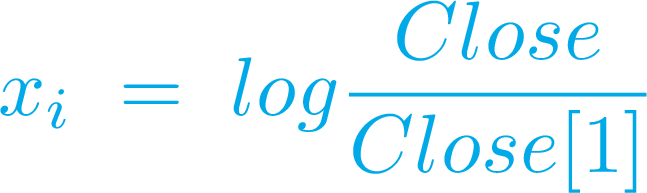
</div>



**Starting with 50-day and 200-day moving averages.**

We create the list of assets.

In [19]:
list_of_assets=historical.asset.unique()
list_of_assets

array(['ADA', 'AVAX', 'BNB', 'BTC', 'DOGE', 'ETH', 'SOL', 'SUI', 'TRX',
       'XRP'], dtype=object)

We create the columns for the moving averages with empty values.

In [20]:
historical['EMA_50'] = np.nan
historical['EMA_200'] = np.nan

We calculate the moving averages for each asset separately.

In [21]:
for currency in list_of_assets:
    
    #calculate EMA_50
    historical.loc[historical.asset==currency,'EMA_50']= \
    historical.loc[historical.asset==currency,'close'].ewm(span=50,adjust=False,min_periods=50).mean()
    
    #calculate EMA_200
    historical.loc[historical.asset==currency,'EMA_200']= \
    historical.loc[historical.asset==currency,'close'].ewm(span=200,adjust=False,min_periods=200).mean()

In addtion, we calculate the EMA crossover points, just in case we need them later

In [22]:
historical['bullish']=np.nan
historical['crossover']=np.nan

In [23]:
for currency in list_of_assets:
    
    #calculate bullish (if EMA_50 > EMA_200 then 1, else 0)
    historical.loc[historical.asset==currency,'bullish']= \
    np.where(historical.loc[historical.asset==currency,'EMA_50'] > historical.loc[historical.asset==currency,'EMA_200'],1,0)
    
    #calculate crossover (if EMA_50 crosses above then the value calculated will be 1. If it crosses below, then -1)
    historical.loc[historical.asset==currency,'crossover']=historical.loc[historical.asset==currency,'bullish'].diff()

**Now for the Annual historical volatility**

We start creating the historical_volatility column with empty values.

In [24]:
historical['annual_historical_volatility'] = np.nan

In [25]:
for currency in list_of_assets:
    
    #calculate porcentual changes of close price by day 
    close_price_difference= 1+historical.loc[historical.asset==currency,'close'].pct_change()
    
    #calculate the annual historical_volatility
    historical.loc[historical.asset==currency,'annual_historical_volatility']= \
    close_price_difference.rolling(window=20).std() * np.sqrt(365)

## WE SAVE IN THE DATAMART

In [26]:
data_file_name_pickle='crypto_historical_data.pickle'
data_file_name_excel='crypto_historical_data.xlsx'

In [27]:
path_pickle = '../../02_Data/03_Final/' + data_file_name_pickle
path_excel = '../../02_Data/03_Final/' + data_file_name_excel

In [28]:
historical.to_pickle(path_pickle)
historical.to_excel(path_excel,sheet_name='Crypto Historical Data')